In [ ]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data29044


In [ ]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. All changes under this directory will be kept even after reset. Please clean unnecessary files in time to speed up environment loading.
!ls /home/aistudio/work

### 一、解压数据集

In [ ]:
# 解压缩数据集
!cd /home/aistudio/data/data29044 && unzip -q -o GestureC.zip

### 二、数据集处理

In [ ]:
# 引入依赖的各种包
import os  

In [ ]:
# 统计各种类别图片的个数
def get_sample_count(path):
    digital_count_dict = {}
    for files in os.listdir(path):
        count = 0
        for filename in os.listdir('%s/%s' % (path, files)):
            count += 1
        digital_count_dict[files] = count
    return digital_count_dict
 
get_sample_count(r'/home/aistudio/data/data29044/GestureC')

{'2': 206,
 '5': 207,
 '3': 206,
 '6': 207,
 '0': 205,
 '4': 207,
 '7': 206,
 '1': 206,
 '8': 208,
 '9': 204}

In [ ]:
# 将数据集中的图片的路径写入该框架下的.list格式的文件, 每一行的前半部分是图片路径，一个空格后面是该图片手势表示的数字
def make_path_list(path):
    os.chdir(r'/home/aistudio/data/data29044/')
    if(os.path.exists('./alldata.list')):
        os.remove('./alldata.list')
    with open('./alldata.list', 'a') as alldata:
        for files in os.listdir(path):
            for img_path in os.listdir('%s/%s' % (path, files)):
                alldata.write(os.path.join(path, files, img_path) + '\t' + files + '\n')
    return print('列表已生成')

make_path_list(r'/home/aistudio/data/data29044/GestureC')

列表已生成


### 三、数据集分割

In [ ]:
# 引入依赖的包
import numpy as np

In [ ]:
# 按照7:2:1的比例将数据集分成训练数据集train_data.list、测试数据集test-data.list、验证数据集eval_data.list
digital_count_dict = get_sample_count(r'/home/aistudio/data/data29044/GestureC')

def split_dataset(listpath, test_p=0.2, eval_p=0.1, count_dict=digital_count_dict):
    # 每次运行更新
    if(os.path.exists('./train_data.list')):
        os.remove('./train_data.list')
    if(os.path.exists('./test_data.list')):
        os.remove('./test_data.list')
    if(os.path.exists('./eval_data.list')):
        os.remove('./eval_data.list')
    
    start_sign = 10
 
    # 开始分割数据集合
    with open(r'%s/alldata.list' % listpath, 'r') as f:
            lines = f.readlines()
            for line in lines:
                img, label = line.replace('\n', '').split('\t')

                # 说明是新的手势
                if label != start_sign:
                    count_sign = 0
                    # 得到该手势的总数 
                    total_count = count_dict[label]
                    # 用于测试的
                    test_count = int(total_count * test_p)
                    # 用于验证的
                    eval_count = int(total_count * eval_p)
                    # 该手势的图片编号
                    total_sign = np.arange(total_count)
                    # 随机打乱
                    np.random.shuffle(total_sign)
                    # 测试的编号
                    test_sign = total_sign[: test_count]
                    # 验证的编号
                    eval_sign = total_sign[test_count: (test_count + eval_count)]
                
                if count_sign in test_sign:
                    with open('./test_data.list', 'a') as test_data:
                        test_data.write(line)
                elif count_sign in eval_sign:
                    with open('./eval_data.list', 'a') as eval_data:
                        eval_data.write(line)
                else:
                    with open('./train_data.list', 'a') as train_data:
                        train_data.write(line)
                count_sign += 1
                start_sign = label

    return print('数据集分割完成')

split_dataset(r'/home/aistudio/data/data29044')


数据集分割完成


In [ ]:
# 看一下各个数据集的样本总数以及各个类别的数
def view_dataset(listpath):
    count_dict = {}
    for ij in os.listdir(listpath):
        if '.list' in ij:
            type_dict = {}
            with open(r'%s/%s' % (listpath, ij), 'r') as f:
                lines = f.readlines()
                count = 0
                for line in lines:
                    img, label = line.replace('\n', '').split('\t')
                    if label in type_dict:
                        type_dict[label] += 1
                    else:
                        type_dict[label] = 1
                    count += 1
            count_dict[ij] = [count, type_dict]
    return count_dict
                    
view_dataset(r'/home/aistudio/data/data29044')


{'train_data.list': [1453,
  {'2': 145,
   '5': 146,
   '3': 145,
   '6': 146,
   '0': 144,
   '4': 146,
   '7': 145,
   '1': 145,
   '8': 147,
   '9': 144}],
 'alldata.list': [2062,
  {'2': 206,
   '5': 207,
   '3': 206,
   '6': 207,
   '0': 205,
   '4': 207,
   '7': 206,
   '1': 206,
   '8': 208,
   '9': 204}],
 'eval_data.list': [200,
  {'2': 20,
   '5': 20,
   '3': 20,
   '6': 20,
   '0': 20,
   '4': 20,
   '7': 20,
   '1': 20,
   '8': 20,
   '9': 20}],
 'test_data.list': [409,
  {'2': 41,
   '5': 41,
   '3': 41,
   '6': 41,
   '0': 41,
   '4': 41,
   '7': 41,
   '1': 41,
   '8': 41,
   '9': 40}]}

### 四、数据流形成

In [ ]:
# 引入包
from PIL import Image
import paddle
from multiprocessing import cpu_count

In [ ]:
# 因为数据是图片，为了应用全连接神经网络，需要将每个图片变为(1,3*100*100)的向量形式
# 定义数据集的reader
def data_mapper(sample):
    img, label = sample
    img = Image.open(img)
    # 利用平滑的方式将图片变为100*100的
    img = img.resize((100, 100), Image.ANTIALIAS)
    img = np.array(img).astype('float32')
    # 变为(1, 30000)的向量
    img = img.transpose((2, 0, 1))
    # 归一化
    img = img/255.0
    return img, label

def data_reader(data_list_path):
    print(data_list_path)
    def reader():
        with open(data_list_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                img, label = line.replace('\n', '').split('\t')
                yield img, int(label)
    return paddle.reader.xmap_readers(data_mapper, reader, cpu_count(), 512)

# 用于训练的数据提供器,data_reader
train_reader = paddle.batch(reader=paddle.reader.shuffle(reader=data_reader(r'/home/aistudio/data/data29044/train_data.list'),
 buf_size=256), batch_size=16)
# 用于测试的数据提供器
test_reader = paddle.batch(reader=data_reader(r'/home/aistudio/data/data29044/test_data.list'), batch_size=32) 
# 用于验证的数据提供器
eval_reader = paddle.batch(reader=data_reader(r'/home/aistudio/data/data29044/eval_data.list'), batch_size=32) 


/home/aistudio/data/data29044/train_data.list
/home/aistudio/data/data29044/test_data.list
/home/aistudio/data/data29044/eval_data.list


### 五、卷积神经网络配置

In [ ]:
# 引入需要的包
import paddle.fluid as fluid
import paddle.fluid.layers as layers
from multiprocessing import cpu_count
from paddle.fluid.dygraph import Pool2D,Conv2D
from paddle.fluid.dygraph import Linear

In [35]:
# 删除模型运行生成的文件
def remove_file(path, name='.pdparams'):
    filelist=os.listdir(path)
    for f in filelist:
        if name in f:
            filepath = os.path.join(path, f)
            if os.path.isfile(filepath):
                os.remove(filepath)
remove_file(r'/home/aistudio/data/data29044')

In [36]:
# 配置卷积神经网络
bp_config = {'learningrate': 0.002, 'iters': 500}
# 定义网络
class CNNBP(fluid.dygraph.Layer):
    def __init__(self):
        super(CNNBP, self).__init__()
        self.conv1 = Conv2D(num_channels=3, num_filters=16, filter_size=5, stride=1, act='relu')
        self.pool1 = Pool2D(pool_size=2, pool_stride=2, pool_type='max', pool_padding=0)

        self.conv2 = Conv2D(num_channels=16, num_filters=32, filter_size=3, stride=1, act='relu')
        self.pool2 = Pool2D(pool_size=2, pool_stride=2, pool_type='max', pool_padding=0)

        self.conv3 = Conv2D(num_channels=32, num_filters=16, filter_size=3, stride=1, act='relu')

        self.hidden1 = Linear(16*21*21, 512, act='relu')
        self.hidden2 = Linear(512, 10, act='softmax')

    def forward(self, input):

        x = self.conv1(input)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
   
        x = layers.flatten(x)
        x = fluid.layers.dropout(x, dropout_prob=0.5)
        x = self.hidden1(x)
        x = fluid.layers.dropout(x, dropout_prob=0.5)
        y = self.hidden2(x)
        return y


In [38]:
# 输出验证数据集、测试数据集的误差以及精确度
train_loss_plot = []
train_acc_plot = []

test_loss_plot = []
test_acc_plot = []

#用动态图进行训练
with fluid.dygraph.guard(fluid.CUDAPlace(0)):
    model=CNNBP() #模型实例化
    model.train() #训练模式
    # 优化求解器
    opt=fluid.optimizer.SGDOptimizer(learning_rate=bp_config['learningrate'], parameter_list=model.parameters())
    for pass_num in range(bp_config['iters']):
        print('迭代次数：', pass_num)
        # 记录训练数据的误差和精确度
        batch_train_loss = []
        batch_train_acc = []
        for batch_id, data in enumerate(train_reader()):

            images=np.array([x[0].reshape(3,100,100) for x in data],np.float32)

            labels = np.array([x[1] for x in data]).astype('int64')
            labels = labels[:, np.newaxis]

            image=fluid.dygraph.to_variable(images)
            label=fluid.dygraph.to_variable(labels)
            predict=model(image)#预测

            loss=fluid.layers.cross_entropy(predict,label)
            avg_loss=fluid.layers.mean(loss)#获取loss值
          
            acc=fluid.layers.accuracy(predict,label)#计算精度
            # 存储训练数据集的
            batch_train_loss.append(avg_loss.numpy())
            batch_train_acc.append(acc.numpy())

            avg_loss.backward()
            opt.minimize(avg_loss)
            model.clear_gradients()

        # 计算测试数据的精确度以及loss
        taccs = []
        for test_batch_id, test_data in enumerate(test_reader()):#测试集
            test_images=np.array([x[0].reshape(3,100,100) for x in test_data],np.float32)
            test_labels = np.array([x[1] for x in test_data]).astype('int64')
            test_labels = test_labels[:, np.newaxis]

            timage=fluid.dygraph.to_variable(test_images)
            tlabel=fluid.dygraph.to_variable(test_labels)
            
            tpredict=model(timage)       
            tacc=fluid.layers.accuracy(tpredict, tlabel)
            tloss=fluid.layers.cross_entropy(tpredict, tlabel)
            taccs.append(tacc.numpy()[0])
            tavg_acc = np.mean(taccs)

        # 存储测试数据结果
        test_loss_plot.append(np.mean(tloss.numpy()))
        test_acc_plot.append(tavg_acc)
        # 存储训练数据集结果
        train_loss_result = sum(batch_train_loss) / len(batch_train_loss)
        train_acc_result = sum(batch_train_acc) / len(batch_train_acc)
        train_loss_plot.append(train_loss_result)
        train_acc_plot.append(train_acc_result)

        print('训练数据集：误差', train_loss_result, '正确率', train_acc_result)
        print('测试数据集：误差', np.mean(tloss.numpy()), '正确率', tavg_acc)

        # 保存的模型
        if train_acc_result > 0.95 and tavg_acc > 0.88: # 训练数据达到0.95以后就保存模型
            fluid.save_dygraph(model.state_dict(),'./para/CNNBP%s' % pass_num)



/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


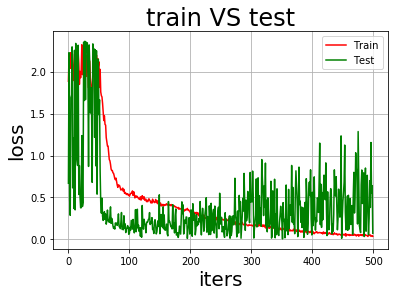

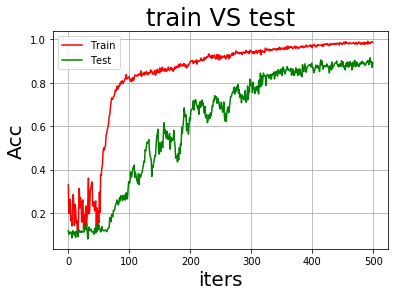

In [39]:
# 绘制图片
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 显示中文
mpl.rcParams['axes.unicode_minus'] = False  # 显示负号

# 绘制训练数据集和测试数据集的对比曲线
def draw_loss(traindata, testdata, yl='loss'):
    plt.title('train VS test', fontsize=24)
    plt.xlabel("iters", fontsize=20)
    plt.ylabel(yl, fontsize=20)
    plt.plot(list(range(len(traindata))), traindata, color='red',label='Train') 
    plt.plot(list(range(len(testdata))), testdata, color='green',label='Test') 
    plt.legend()
    plt.grid()
    plt.show()

draw_loss(train_loss_plot, test_loss_plot)
draw_loss(train_acc_plot, test_acc_plot, 'Acc')

In [40]:
# 根据测试数据集合的精确率选择效果最后的模型
judge_best = [[i, test_acc_plot[i], test_loss_plot[i]] for i in range(len(test_acc_plot))]
best_model_sign = sorted(judge_best, key= lambda x: (-x[1], x[2]))[0][0]

# 根据得到的最好的模型针对验证数据集进行精确率的计算
with fluid.dygraph.guard(fluid.CUDAPlace(0)):
    accs = []
    model_dict, _ = fluid.load_dygraph('./para/CNNBP%s' % best_model_sign)
    model = CNNBP()
    model.load_dict(model_dict) #加载模型参数
    model.eval() #训练模式
    for batch_id,data in enumerate(eval_reader()):#测试集
        images=np.array([x[0].reshape(3,100,100) for x in data],np.float32)
        labels = np.array([x[1] for x in data]).astype('int64')
        labels = labels[:, np.newaxis]

        image=fluid.dygraph.to_variable(images)
        label=fluid.dygraph.to_variable(labels)
        
        predict=model(image)       
        acc=fluid.layers.accuracy(predict,label)
        accs.append(acc.numpy()[0])
        avg_acc = np.mean(accs)
    print(avg_acc)

0.96428573


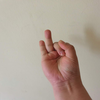

真实数字为: 2 预测的数字为 0


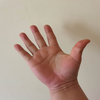

真实数字为: 5 预测的数字为 5


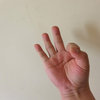

真实数字为: 9 预测的数字为 3
真实数字为: 4 预测的数字为 0


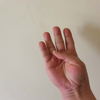

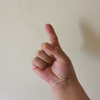

真实数字为: 1 预测的数字为 1


In [54]:
# 判断自己上传的照片的准确率,
def predict_picture(path='/home/aistudio/data/data29044/MyPicture'):
    # path 存储自己图片的文件夹.其中图片名称的第一个字符必须为图片中手势表示的数字
    for p in os.listdir(path):
        d_name = p[0]
        # 图片的路径
        filepath = os.path.join(path, p)
        img = Image.open(filepath)
        # 将分辨率调制一样
        img = img.resize((100, 100), Image.ANTIALIAS)
        display(img)
        # 显示图片
        img = np.array(img).astype('float32')
        # 转换维度
        img = img.transpose((2, 0, 1))
        #构建预测动态图过程
        with fluid.dygraph.guard(fluid.CUDAPlace(0)):
            model=CNNBP()#模型实例化
            model_dict,_=fluid.load_dygraph('./para/CNNBP%s' % best_model_sign)
            model.load_dict(model_dict)#加载模型参数
            model.eval()#评估模式

            infer_img=np.array(img).astype('float32')
            infer_img=infer_img[np.newaxis,:, : ,:]
            infer_img = fluid.dygraph.to_variable(infer_img)
            # 预测得到的softmax结果
            result=model(infer_img)
            print('真实数字为:', d_name, '预测的数字为', np.argmax(result.numpy()))
predict_picture(path='/home/aistudio/data/data29044/MyPicture')

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 